# Import des librairies

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,8 #Taille de la figure affichée
sns.set_style("darkgrid")#style de l'arrière plan de seaborn 

# Chargement des données 

In [4]:
df= pd.read_csv("enregistrements.csv",sep="\t")
df.head()

,Sharding,Nb_shards,Requete,Temp_exec,Num_run,Mean_ref_time,Std_ref_time
0,Names,3,requête_1,0.040992,0,0.231475,0.00703
1,Names,3,requête_1,0.046078,1,0.231475,0.00703
2,Names,3,requête_1,0.041978,2,0.231475,0.00703
3,Names,3,requête_1,0.041296,3,0.231475,0.00703
4,Names,3,requête_1,0.042637,4,0.231475,0.00703


# On marque les temps d'exécution min et max pour chaque configuration

In [5]:
df["max_shard_nb"]= False
df["min_shard_nb"]= False

In [6]:
list_df =[]
for i in df["Sharding"].unique(): 
    for j in df["Nb_shards"].unique() : 
        df_temp = df[(df["Sharding"]==i) & (df["Nb_shards"]==j)] 
        df_temp.loc[df_temp["Temp_exec"]==df_temp["Temp_exec"].max(), "max_shard_nb"] = True
        df_temp.loc[df_temp["Temp_exec"]==df_temp["Temp_exec"].min(), "min_shard_nb"] = True
        list_df.append(df_temp)
        
df =pd.concat(list_df)

# Evolution du temps d'exécution des requêtes en fonction du nombre de shards : 

### On retire les valeurs extrêmes


In [7]:
df_filtered = df[(~df["max_shard_nb"]) & (~df["min_shard_nb"]) ]
df_filtered.shape

(684, 9)

In [8]:
df_filtered.head()

,Sharding,Nb_shards,Requete,Temp_exec,Num_run,Mean_ref_time,Std_ref_time,max_shard_nb,min_shard_nb
1,Names,3,requête_1,0.046078,1,0.231475,0.00703,False,False
2,Names,3,requête_1,0.041978,2,0.231475,0.00703,False,False
3,Names,3,requête_1,0.041296,3,0.231475,0.00703,False,False
4,Names,3,requête_1,0.042637,4,0.231475,0.00703,False,False
5,Names,3,requête_1,0.042527,5,0.231475,0.00703,False,False


# Visualisations : 

### Comparaison des requêtes de référence :



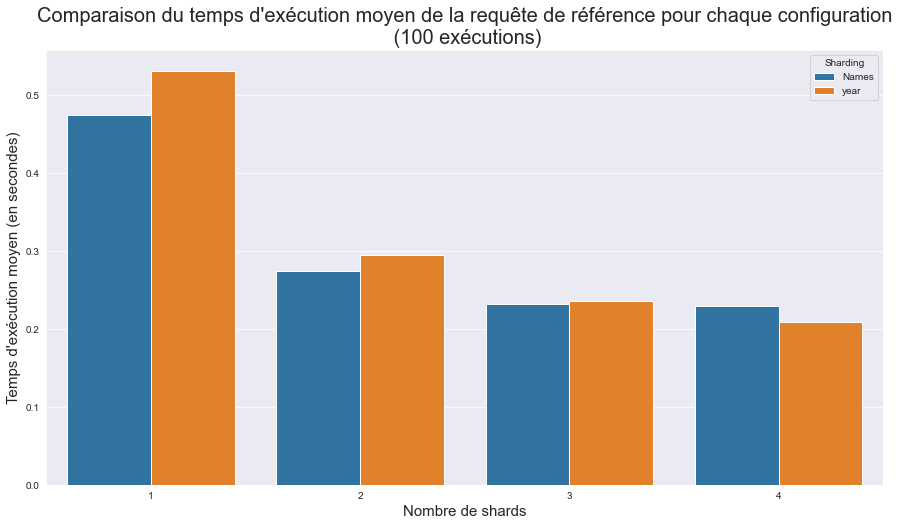

In [25]:
df_temp = df_filtered.groupby(["Nb_shards","Sharding"]).agg("mean")[["Mean_ref_time"]].reset_index()

sns.barplot(data=df_temp, x="Nb_shards",y="Mean_ref_time", hue="Sharding")
plt.title("Comparaison du temps d'exécution moyen de la requête de référence pour chaque configuration\n (100 exécutions)", fontsize=20)
plt.ylabel("Temps d'exécution moyen (en secondes)", fontsize=15)
plt.xlabel("Nombre de shards", fontsize=15)
plt.show()

### Pour chaque requête 

### Pour chaque shards : 

In [28]:
df_temp[df_temp["Nb_shards"]==1]

,Nb_shards,Sharding,Requete,Temp_exec,Num_run,Mean_ref_time,Std_ref_time,max_shard_nb,min_shard_nb
0,1,Names,requête_1,0.044428,4.500000,0.473829,0.010894,0.0,0.0
1,1,Names,requête_2,1.030903,4.500000,0.473829,0.010894,0.0,0.0
2,1,Names,requête_3,1.037851,4.500000,0.473829,0.010894,0.0,0.0
3,1,Names,requête_4,0.045481,4.263158,0.473859,0.010903,0.0,0.0
4,1,Names,requête_5,0.822097,4.500000,0.473829,0.010894,0.0,0.0
5,1,Names,requête_7,0.330301,4.500000,0.473829,0.010894,0.0,0.0
6,1,Names,requête_8,9.070489,4.263158,0.473859,0.010903,0.0,0.0
7,1,year,requête_1,0.260225,4.500000,0.531284,0.051827,0.0,0.0
8,1,year,requête_2,1.025397,4.500000,0.531284,0.051827,0.0,0.0
9,1,year,requête_3,1.037292,4.500000,0.531284,0.051827,0.0,0.0


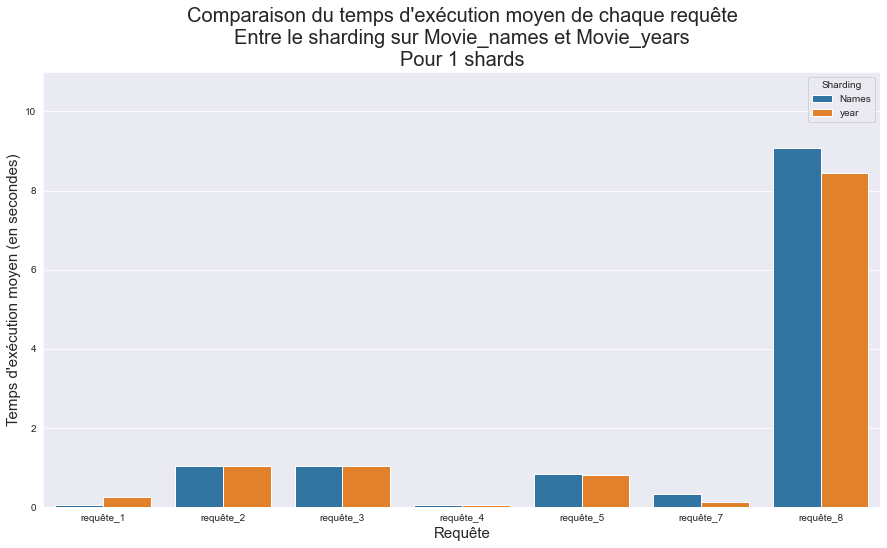

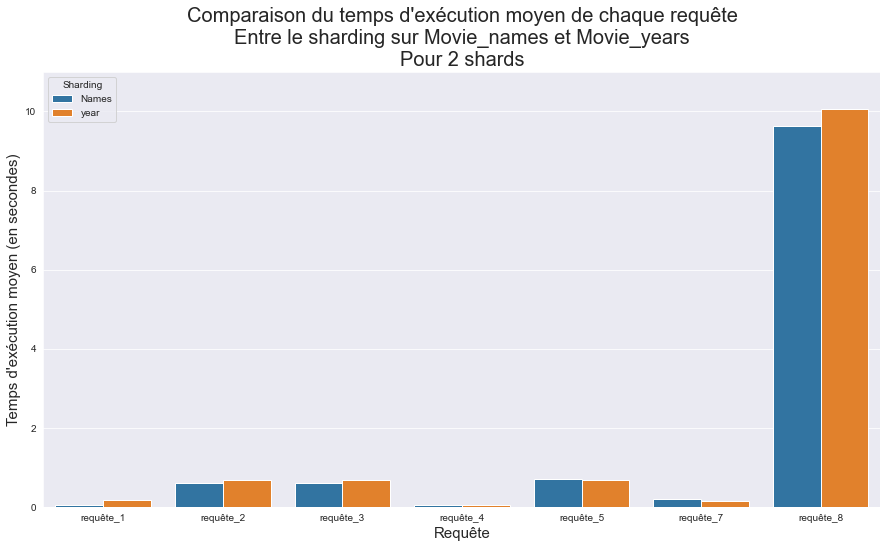

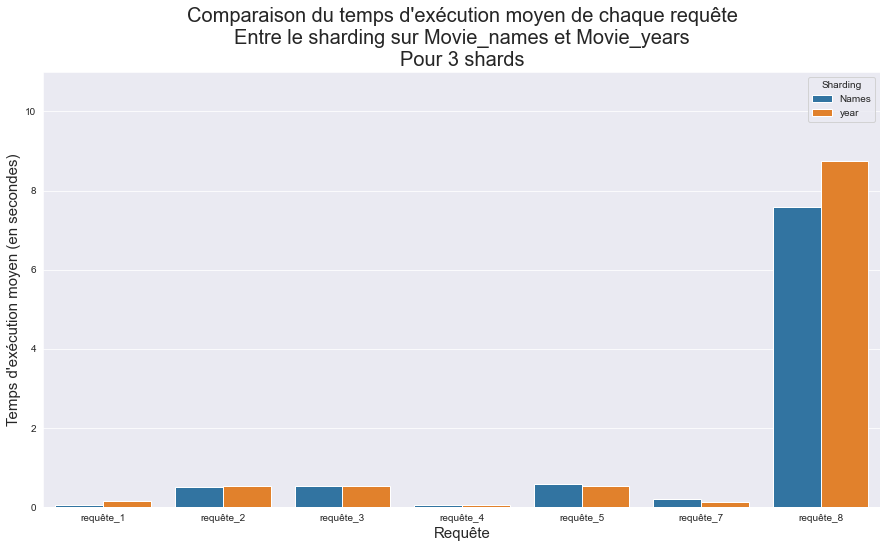

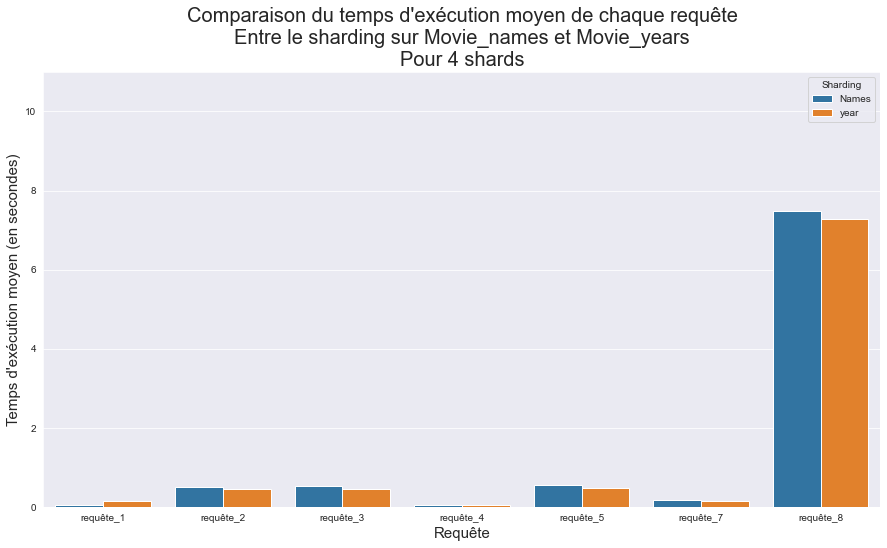

In [31]:
df_temp = df_filtered.groupby(["Nb_shards","Sharding","Requete"]).agg("mean").reset_index()

for shards in df_temp["Nb_shards"].unique(): 
    df_temp2= df_temp[df_temp["Nb_shards"]==shards]
    sns.barplot(data=df_temp2, x="Requete",y="Temp_exec", hue="Sharding")
    plt.title(f"Comparaison du temps d'exécution moyen de chaque requête\nEntre le sharding sur Movie_names et Movie_years\nPour {shards} shards", fontsize=20)
    plt.ylabel("Temps d'exécution moyen (en secondes)", fontsize=15)
    plt.xlabel("Requête", fontsize=15)
    plt.ylim((0,11))
    plt.show()


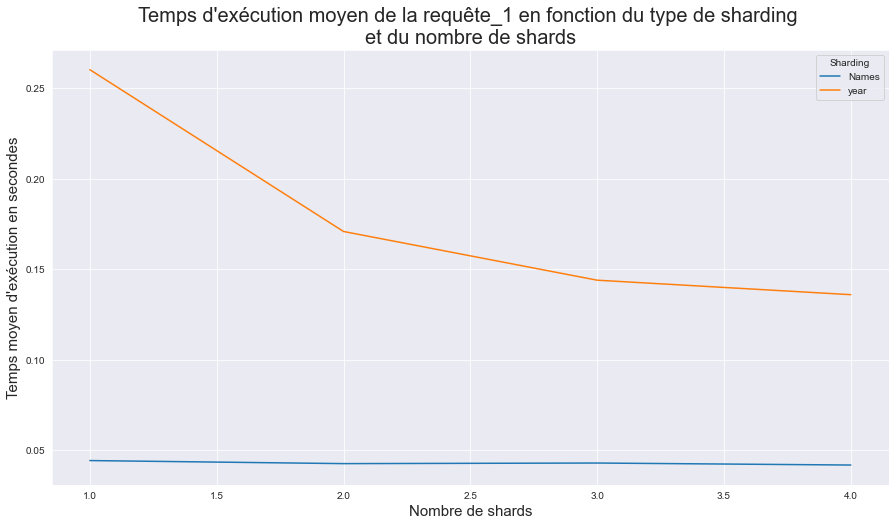

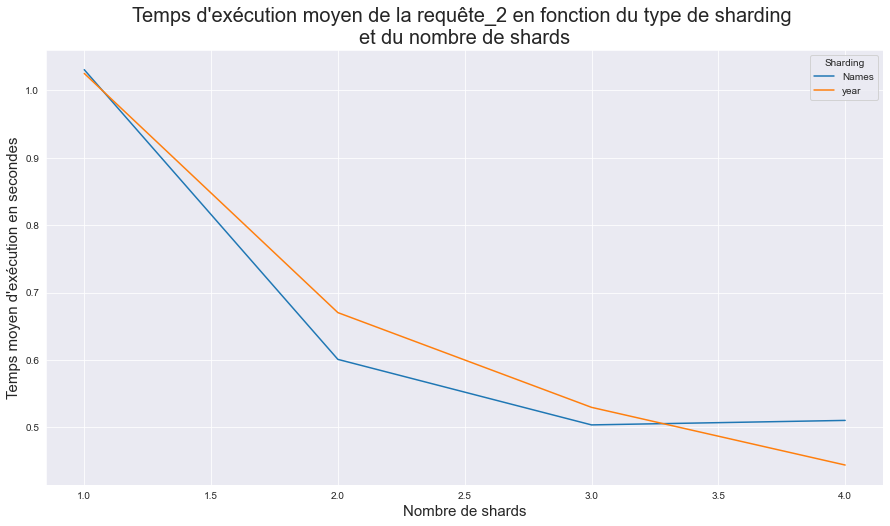

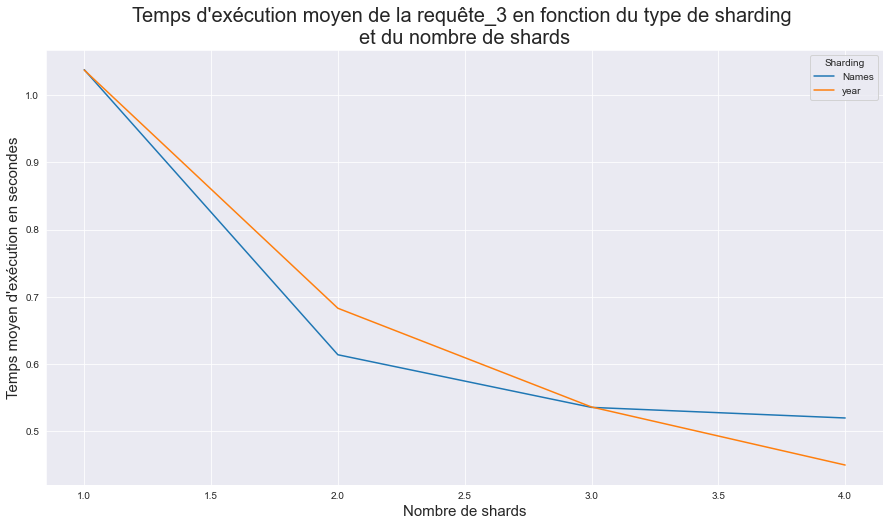

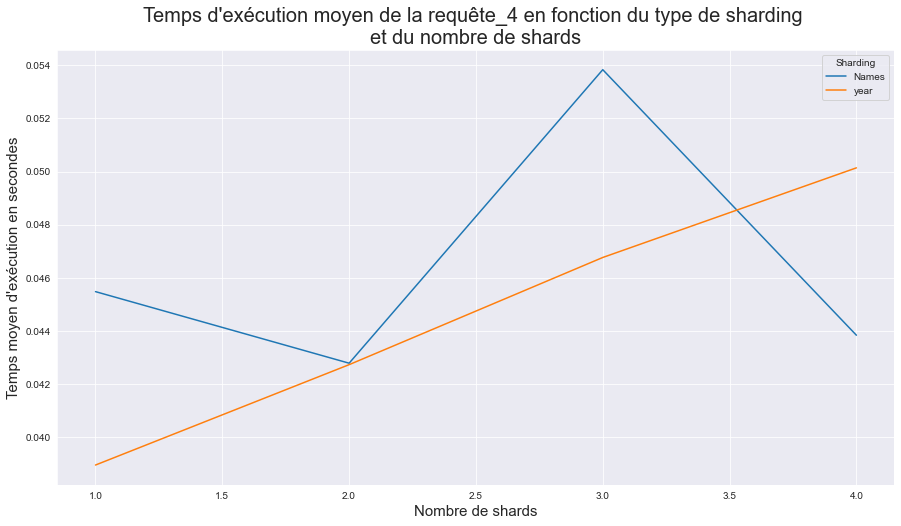

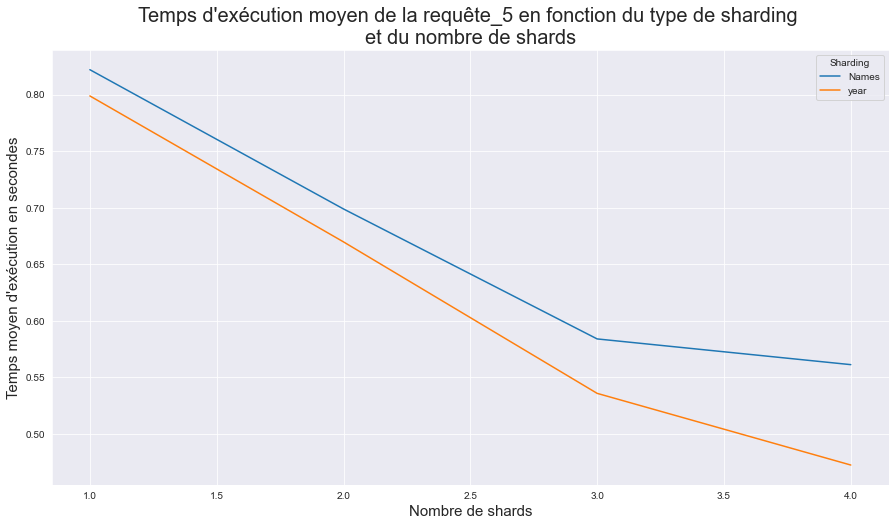

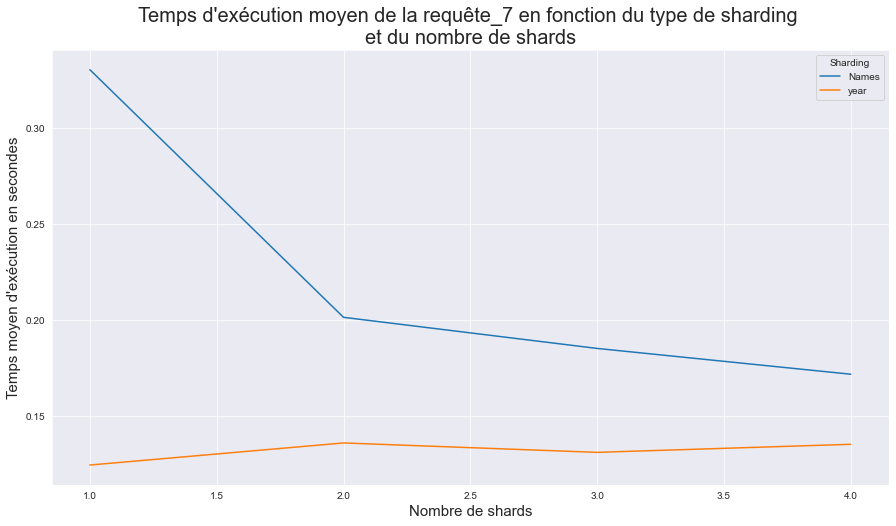

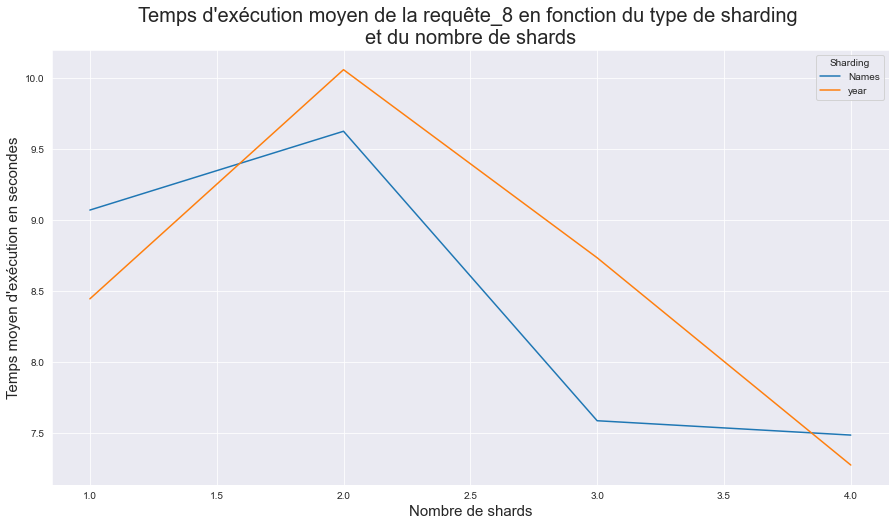

In [39]:
df_temp = df_filtered.groupby(["Requete","Nb_shards","Sharding"]).agg("mean")[["Temp_exec"]].reset_index()

for query in df_temp["Requete"].unique() : 
    df_temp2 = df_temp[df_temp["Requete"]==query]
    sns.lineplot(data=df_temp2, x="Nb_shards",y="Temp_exec",hue="Sharding")
    plt.title(f"Temps d'exécution moyen de la {query} en fonction du type de sharding \net du nombre de shards",fontsize=20)
    plt.xlabel("Nombre de shards",fontsize=15)
    plt.ylabel("Temps moyen d'exécution en secondes",fontsize=15)
    plt.show()
    

In [24]:
df_temp.head(10)

Temp_exec   Num_run  Mean_ref_time  \
Nb_shards Sharding Requete                                         
1         Names    requête_1   0.044428  4.500000       0.473829   
                   requête_2   1.030903  4.500000       0.473829   
                   requête_3   1.037851  4.500000       0.473829   
                   requête_4   0.045481  4.263158       0.473859   
                   requête_5   0.822097  4.500000       0.473829   
                   requête_7   0.330301  4.500000       0.473829   
                   requête_8   9.070489  4.263158       0.473859   
          year     requête_1   0.260225  4.500000       0.531284   
                   requête_2   1.025397  4.500000       0.531284   
                   requête_3   1.037292  4.500000       0.531284   

                              Std_ref_time  max_shard_nb  min_shard_nb  
Nb_shards Sharding Requete                                              
1         Names    requête_1      0.010894           0.0           0.0  
                   requête_2      0.010894           0.0           0.0  
                   requête_3      0.010894           0.0           0.0  
                   requête_4      0.010903           0.0           0.0  
                   requête_5      0.010894           0.0           0.0  
                   requête_7      0.010894           0.0           0.0  
                   requête_8      0.010903           0.0           0.0  
          year     requête_1      0.051827           0.0           0.0  
                   requête_2      0.051827           0.0           0.0  
                   requête_3      0.051827           0.0           0.0

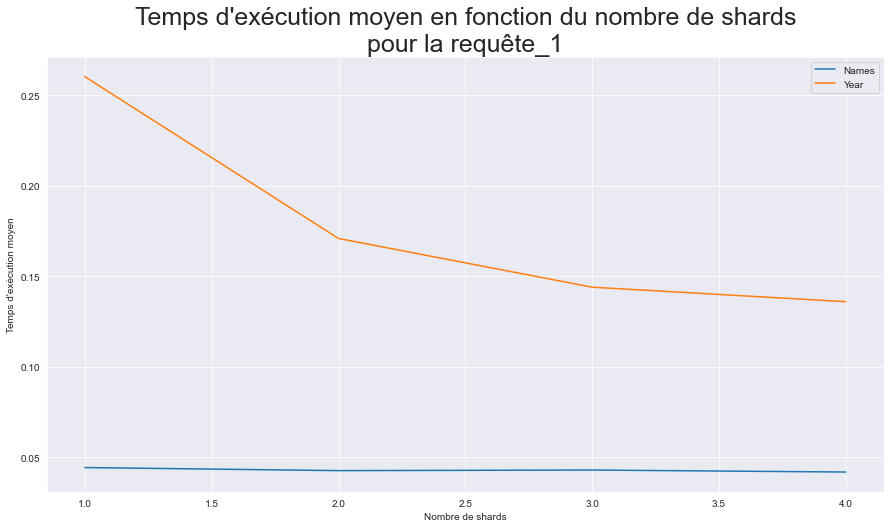

In [7]:
query= "requête_1"

df_temp = df_filtered.groupby(["Sharding","Nb_shards","Requete"]).agg("mean")[["Temp_exec","Mean_ref_time"]].reset_index()
sns.lineplot(data=df_temp[(df_temp["Requete"]==query) & (df_temp["Sharding"]=="Names")],
            x="Nb_shards", y="Temp_exec",label="Names")
sns.lineplot(data=df_temp[(df_temp["Requete"]==query) & (df_temp["Sharding"]=="year")],
            x="Nb_shards", y="Temp_exec", label="Year")

plt.xlabel("Nombre de shards")
plt.ylabel("Temps d'exécution moyen")

plt.title(f"Temps d'exécution moyen en fonction du nombre de shards\npour la {query}", fontsize=25)
plt.show()

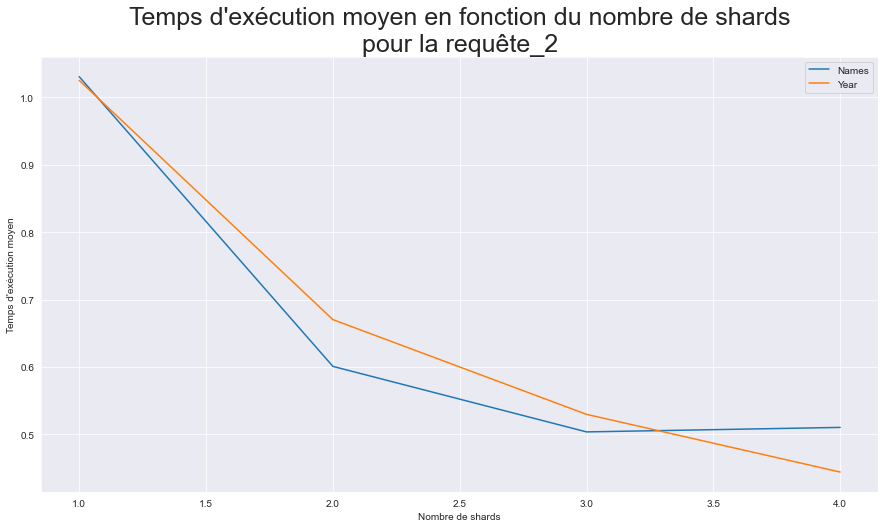

In [8]:
query= "requête_2"

df_temp = df_filtered.groupby(["Sharding","Nb_shards","Requete"]).agg("mean")[["Temp_exec","Mean_ref_time"]].reset_index()
sns.lineplot(data=df_temp[(df_temp["Requete"]==query) & (df_temp["Sharding"]=="Names")],
            x="Nb_shards", y="Temp_exec",label="Names")
sns.lineplot(data=df_temp[(df_temp["Requete"]==query) & (df_temp["Sharding"]=="year")],
            x="Nb_shards", y="Temp_exec", label="Year")

plt.xlabel("Nombre de shards")
plt.ylabel("Temps d'exécution moyen")

plt.title(f"Temps d'exécution moyen en fonction du nombre de shards\npour la {query}", fontsize=25)
plt.show()

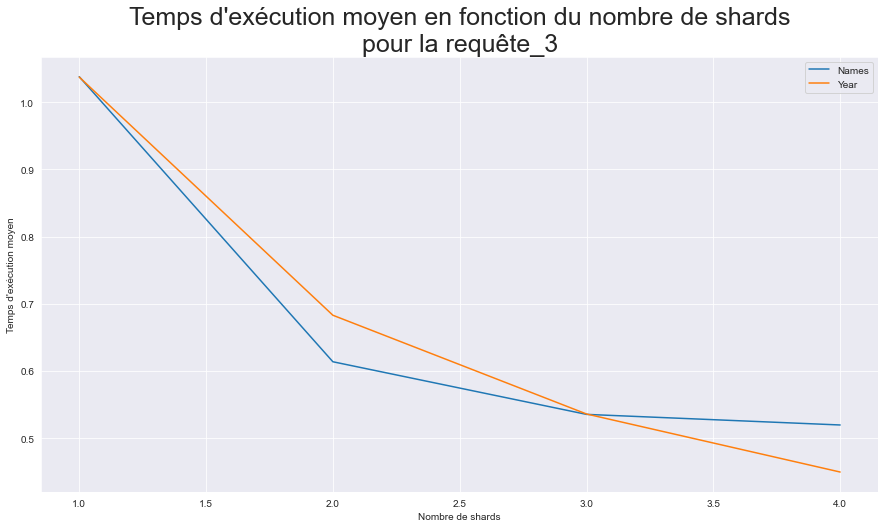

In [9]:
query= "requête_3"

df_temp = df_filtered.groupby(["Sharding","Nb_shards","Requete"]).agg("mean")[["Temp_exec","Mean_ref_time"]].reset_index()
sns.lineplot(data=df_temp[(df_temp["Requete"]==query) & (df_temp["Sharding"]=="Names")],
            x="Nb_shards", y="Temp_exec",label="Names")
sns.lineplot(data=df_temp[(df_temp["Requete"]==query) & (df_temp["Sharding"]=="year")],
            x="Nb_shards", y="Temp_exec", label="Year")

plt.xlabel("Nombre de shards")
plt.ylabel("Temps d'exécution moyen")

plt.title(f"Temps d'exécution moyen en fonction du nombre de shards\npour la {query}", fontsize=25)
plt.show()

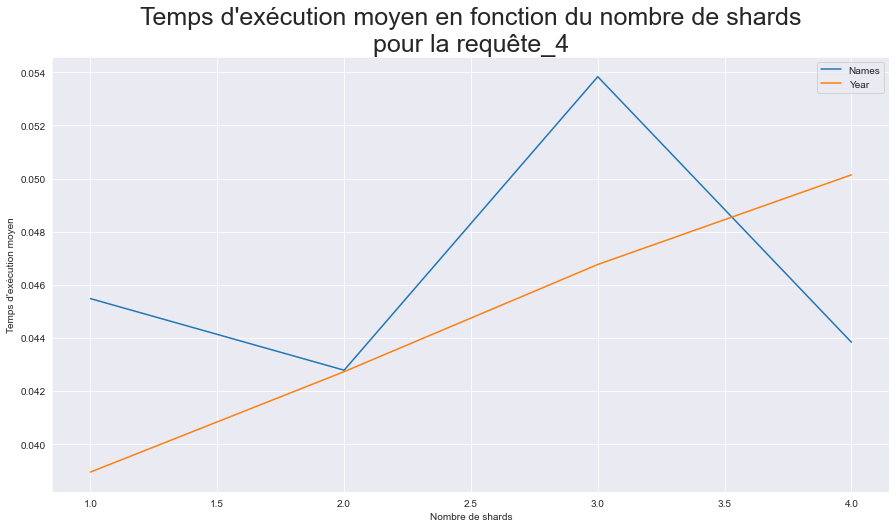

In [10]:
query= "requête_4"

df_temp = df_filtered.groupby(["Sharding","Nb_shards","Requete"]).agg("mean")[["Temp_exec","Mean_ref_time"]].reset_index()
sns.lineplot(data=df_temp[(df_temp["Requete"]==query) & (df_temp["Sharding"]=="Names")],
            x="Nb_shards", y="Temp_exec",label="Names")
sns.lineplot(data=df_temp[(df_temp["Requete"]==query) & (df_temp["Sharding"]=="year")],
            x="Nb_shards", y="Temp_exec", label="Year")

plt.xlabel("Nombre de shards")
plt.ylabel("Temps d'exécution moyen")

plt.title(f"Temps d'exécution moyen en fonction du nombre de shards\npour la {query}", fontsize=25)
plt.show()

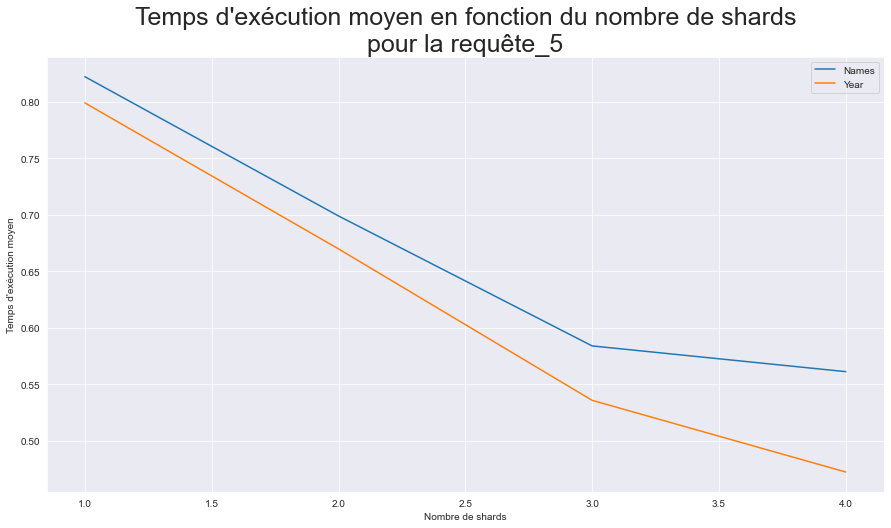

In [11]:
query= "requête_5"

df_temp = df_filtered.groupby(["Sharding","Nb_shards","Requete"]).agg("mean")[["Temp_exec","Mean_ref_time"]].reset_index()
sns.lineplot(data=df_temp[(df_temp["Requete"]==query) & (df_temp["Sharding"]=="Names")],
            x="Nb_shards", y="Temp_exec",label="Names")
sns.lineplot(data=df_temp[(df_temp["Requete"]==query) & (df_temp["Sharding"]=="year")],
            x="Nb_shards", y="Temp_exec", label="Year")

plt.xlabel("Nombre de shards")
plt.ylabel("Temps d'exécution moyen")

plt.title(f"Temps d'exécution moyen en fonction du nombre de shards\npour la {query}", fontsize=25)
plt.show()


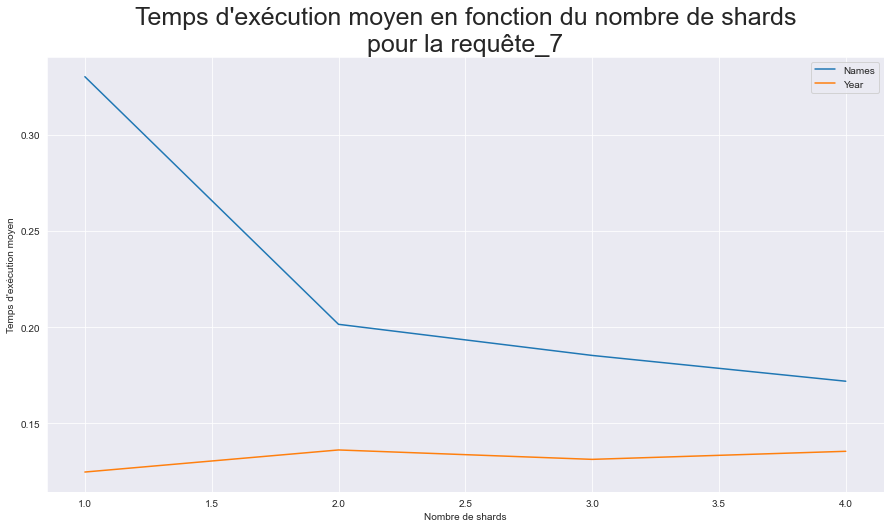

In [12]:
query= "requête_7"

df_temp = df_filtered.groupby(["Sharding","Nb_shards","Requete"]).agg("mean")[["Temp_exec","Mean_ref_time"]].reset_index()
sns.lineplot(data=df_temp[(df_temp["Requete"]==query) & (df_temp["Sharding"]=="Names")],
            x="Nb_shards", y="Temp_exec",label="Names")
sns.lineplot(data=df_temp[(df_temp["Requete"]==query) & (df_temp["Sharding"]=="year")],
            x="Nb_shards", y="Temp_exec", label="Year")

plt.xlabel("Nombre de shards")
plt.ylabel("Temps d'exécution moyen")

plt.title(f"Temps d'exécution moyen en fonction du nombre de shards\npour la {query}", fontsize=25)
plt.show()

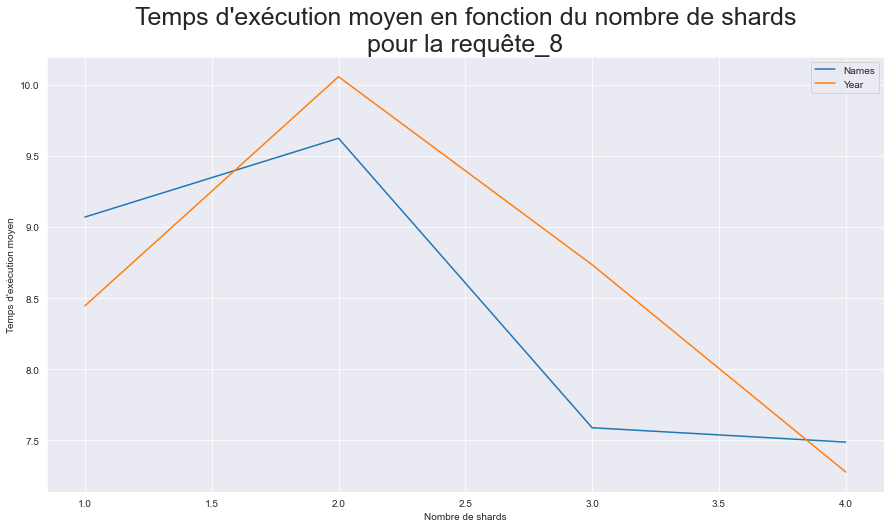

In [13]:
query= "requête_8"

df_temp = df_filtered.groupby(["Sharding","Nb_shards","Requete"]).agg("mean")[["Temp_exec","Mean_ref_time"]].reset_index()
sns.lineplot(data=df_temp[(df_temp["Requete"]==query) & (df_temp["Sharding"]=="Names")],
            x="Nb_shards", y="Temp_exec",label="Names")
sns.lineplot(data=df_temp[(df_temp["Requete"]==query) & (df_temp["Sharding"]=="year")],
            x="Nb_shards", y="Temp_exec", label="Year")

plt.xlabel("Nombre de shards")
plt.ylabel("Temps d'exécution moyen")

plt.title(f"Temps d'exécution moyen en fonction du nombre de shards\npour la {query}", fontsize=25)
plt.show()

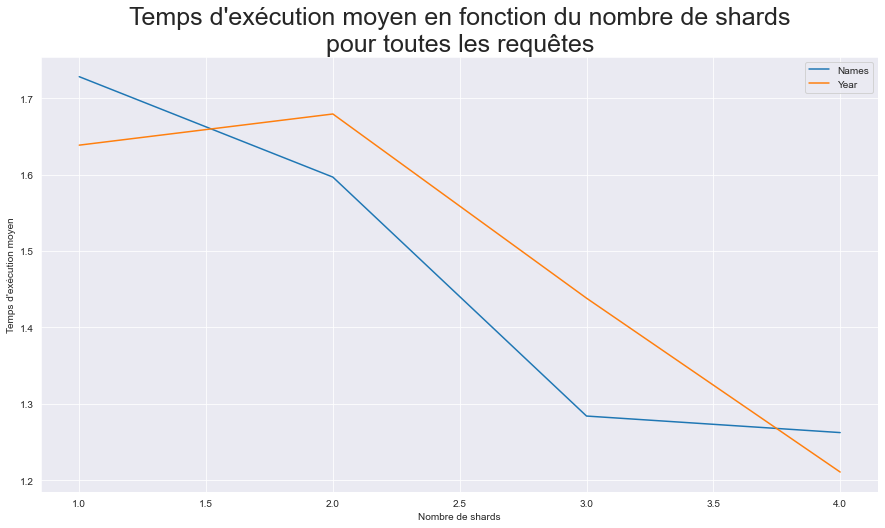

In [14]:
df_temp = df_filtered.groupby(["Sharding","Nb_shards"]).agg("mean")[["Temp_exec","Mean_ref_time"]].reset_index()
sns.lineplot(data=df_temp[ (df_temp["Sharding"]=="Names")],
            x="Nb_shards", y="Temp_exec",label="Names")
sns.lineplot(data=df_temp[ (df_temp["Sharding"]=="year")],
            x="Nb_shards", y="Temp_exec", label="Year")

plt.xlabel("Nombre de shards")
plt.ylabel("Temps d'exécution moyen")

plt.title(f"Temps d'exécution moyen en fonction du nombre de shards\npour toutes les requêtes", fontsize=25)
plt.show()

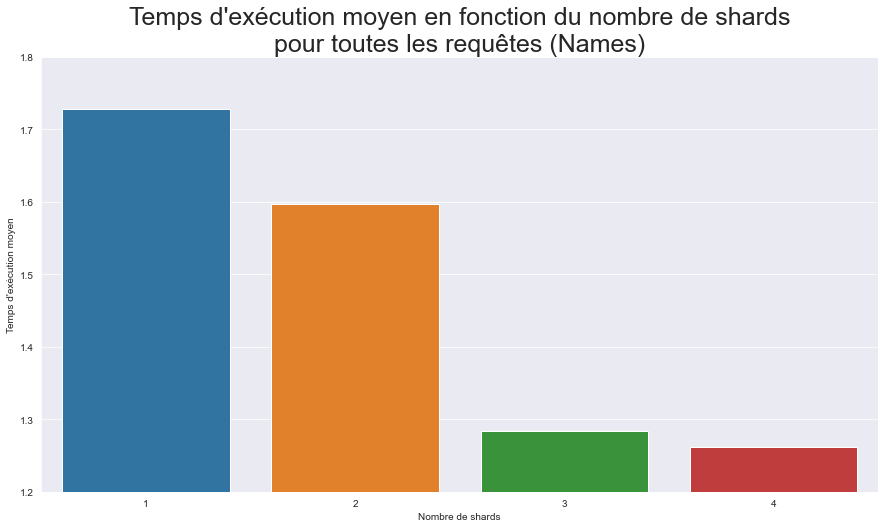

In [15]:
df_temp = df_filtered.groupby(["Sharding","Nb_shards"]).agg("mean")[["Temp_exec","Mean_ref_time"]].reset_index()
sns.barplot(data=df_temp[ (df_temp["Sharding"]=="Names")],
            x="Nb_shards", y="Temp_exec",label="Names")


plt.xlabel("Nombre de shards")
plt.ylabel("Temps d'exécution moyen")
plt.ylim((1.2,1.8))

plt.title(f"Temps d'exécution moyen en fonction du nombre de shards\npour toutes les requêtes (Names)", fontsize=25)
plt.show()

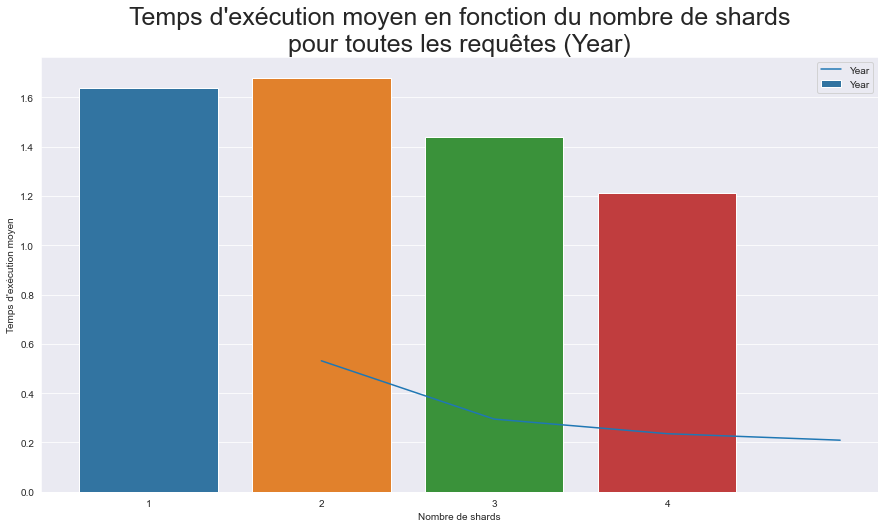

In [17]:
df_temp = df_filtered.groupby(["Sharding","Nb_shards"]).agg("mean")[["Temp_exec","Mean_ref_time"]].reset_index()

sns.barplot(data=df_temp[ (df_temp["Sharding"]=="year")],
            x="Nb_shards", y="Temp_exec", label="Year")
sns.lineplot(data=df_temp[ (df_temp["Sharding"]=="year")],
            x="Nb_shards", y="Mean_ref_time", label="Year")


plt.xlabel("Nombre de shards")
plt.ylabel("Temps d'exécution moyen")

plt.title(f"Temps d'exécution moyen en fonction du nombre de shards\npour toutes les requêtes (Year)", fontsize=25)
plt.show()

### Temps d'exécution total 

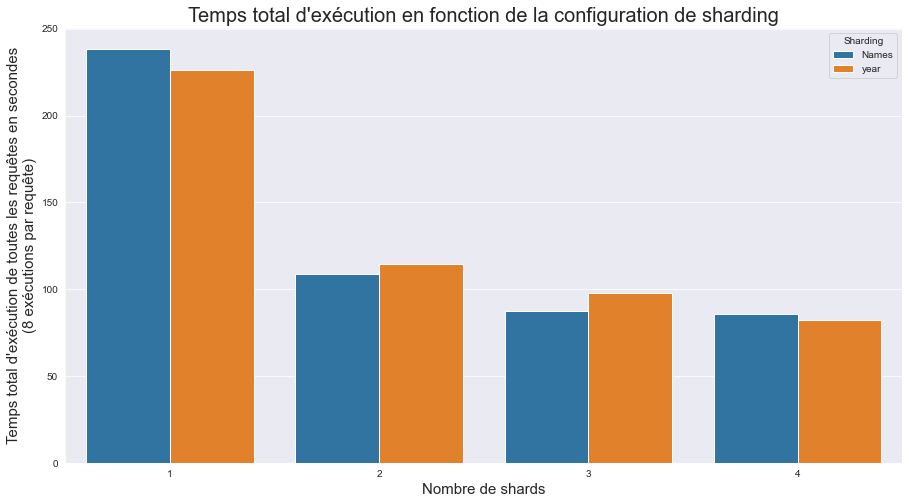

In [44]:
df_temp = df_filtered.groupby(["Nb_shards","Sharding"]).agg("sum").reset_index()

sns.barplot(data=df_temp, x="Nb_shards", y="Temp_exec", hue="Sharding")
plt.ylabel("Temps total d'exécution de toutes les requêtes en secondes\n(8 exécutions par requête)",fontsize=15)
plt.xlabel("Nombre de shards", fontsize="15")
plt.title("Temps total d'exécution en fonction de la configuration de sharding", fontsize=20)
plt.show()

In [43]:
df_temp.head()

,Nb_shards,Sharding,Temp_exec,Num_run,Mean_ref_time,Std_ref_time,max_shard_nb,min_shard_nb
0,1,Names,238.515060,612,65.389602,1.503668,0,0
1,1,year,226.142901,620,73.317181,7.152126,0,0
2,2,Names,108.587409,304,18.633908,0.698274,0,0
3,2,year,114.207771,305,20.046812,1.791618,0,0
4,3,Names,87.309265,313,15.740315,0.478025,0,0
